In [17]:
# Fix imports when running from notebooks/ folder
import sys
from pathlib import Path

project_root = Path.cwd().parent 
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"Added to path: {project_root}")

%load_ext autoreload
%autoreload 2

Added to path: /Users/elshaday/DEV/10Academy/insurance-risk-analysis-week3
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
from src import DataManager 
from tabulate import tabulate
from scripts.constants import Columns, CATEGORY_COLS, NUMERIC_COLS
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from tabulate import tabulate

In [19]:
dm = DataManager()
clean_insurance_df = dm.load_data()

Basic Data Info:

<class 'pandas.core.frame.DataFrame'>
Index: 846034 entries, 0 to 1000097
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   UnderwrittenCoverID          846034 non-null  int64  
 1   PolicyID                     846034 non-null  int64  
 2   TransactionMonth             846034 non-null  object 
 3   IsVATRegistered              846034 non-null  bool   
 4   Citizenship                  846034 non-null  object 
 5   LegalType                    846034 non-null  object 
 6   Title                        846034 non-null  object 
 7   Language                     846034 non-null  object 
 8   Bank                         846034 non-null  object 
 9   AccountType                  846034 non-null  object 
 10  MaritalStatus                846034 non-null  object 
 11  Gender                       846034 non-null  object 
 12  Country                      846034 non-null

In [20]:
clean_insurance_df.describe(include='all')

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,Outlier_TotalPremium,Outlier_TotalClaims,Outlier_CustomValueEstimate
count,846034.000000,846034.000000,846034,846034,846034,846034,846034,846034,846034,846034,...,846034,846034,846034,846034,846034,846034.000000,846034.000000,846034,846034,846034
unique,NaN,NaN,NaN,2,4,6,5,1,11,3,...,14,5,4,1,1,NaN,NaN,2,2,2
top,NaN,NaN,NaN,False,,Individual,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,NaN,NaN,False,False,False
freq,NaN,NaN,NaN,842431,774531,778833,791476,846034,351243,534986,...,690780,694781,792547,846034,846034,NaN,NaN,655740,843597,628337
mean,117215.555207,8922.892923,2015-03-20 06:47:24.702695936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,66.673277,68.374828,NaN,NaN,NaN
min,13.000000,14.000000,2013-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,76786.000000,5753.000000,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
50%,113400.500000,7725.000000,2015-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.566930,0.000000,NaN,NaN,NaN
75%,144881.000000,11751.000000,2015-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.929825,0.000000,NaN,NaN,NaN
max,301175.000000,23246.000000,2015-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1561.080439,393092.105263,NaN,NaN,NaN


In [22]:
print("Data Summarization | Data Structure")

# Convert dtypes Series to DataFrame
dtypes_df = clean_insurance_df.dtypes.reset_index()
dtypes_df.columns = ["Column", "Dtype"]

print(tabulate(dtypes_df, headers="keys", tablefmt="grid"))

Data Summarization | Data Structure
+----+-----------------------------+----------------+
|    | Column                      | Dtype          |
+====+=============================+================+
|  0 | UnderwrittenCoverID         | int64          |
+----+-----------------------------+----------------+
|  1 | PolicyID                    | int64          |
+----+-----------------------------+----------------+
|  2 | TransactionMonth            | datetime64[ns] |
+----+-----------------------------+----------------+
|  3 | IsVATRegistered             | bool           |
+----+-----------------------------+----------------+
|  4 | Citizenship                 | object         |
+----+-----------------------------+----------------+
|  5 | LegalType                   | object         |
+----+-----------------------------+----------------+
|  6 | Title                       | object         |
+----+-----------------------------+----------------+
|  7 | Language                    | object   

In [21]:
print("Data Summarization | Descriptive Stats")

# Variance
total_premium_var = clean_insurance_df[Columns.TotalPremium.value].var()
total_claims_var = clean_insurance_df[Columns.TotalClaims.value].var()

# Standard deviation
total_premium_std = clean_insurance_df[Columns.TotalPremium.value].std()
total_claims_std = clean_insurance_df[Columns.TotalClaims.value].std()

print("Total Premium -> STD:", total_premium_std, "Variance:", total_premium_var)
print("Total Claim -> STD:", total_claims_std, "Variance:", total_claims_var)

Data Summarization | Descriptive Stats
Total Premium -> STD: 163.53799891024707 Variance: 26744.677087567972
Total Claim -> STD: 2480.8587529147685 Variance: 6154660.15191382


In [23]:
print("Numeric Cols Understanding:")

main_numeric_cols = [
    Columns.CustomValueEstimate.value,
    Columns.CapitalOutstanding.value, # Mostly 0
    Columns.SumInsured.value,
    Columns.CalculatedPremiumPerTerm.value,
    Columns.TotalPremium.value,
    Columns.TotalClaims.value,
]


# Summary statistics
summary_df = clean_insurance_df[main_numeric_cols].describe().T
print("=== Summary Statistics ===")
print(tabulate(summary_df, headers="keys", tablefmt="grid", floatfmt=".2f"))

# Count of missing values
missing_df = clean_insurance_df[main_numeric_cols].isna().sum().reset_index()
missing_df.columns = ["Column", "MissingValues"]
print("\n=== Missing Values ===")
print(tabulate(missing_df, headers="keys", tablefmt="grid"))

# Count of zeros
zeros_list = []
for col in main_numeric_cols:
    zeros_list.append([col, (clean_insurance_df[col] == 0).sum()])
zeros_df = pd.DataFrame(zeros_list, columns=["Column", "Zeros"])
print("\n=== Zero Counts ===")
print(tabulate(zeros_df, headers="keys", tablefmt="grid"))

# Top 10 values per column
for col in main_numeric_cols:
    top_values = clean_insurance_df[col].value_counts().head(10).reset_index()
    top_values.columns = [col, "Count"]
    print(f"\n=== Top 10 values in {col} ===")
    print(tabulate(top_values, headers="keys", tablefmt="grid", floatfmt=".2f"))

# TotalClaims values > 1000
high_claims = clean_insurance_df.loc[
    clean_insurance_df["TotalClaims"] > 1000, ["TotalClaims"]
]
print("\n=== TotalClaims > 1000 ===")
print(tabulate(high_claims.head(20), headers="keys", tablefmt="grid", floatfmt=".2f"))


Numeric Cols Understanding:
=== Summary Statistics ===
+--------------------------+-----------+-----------+------------+----------+-----------+-----------+-----------+-------------+
|                          |     count |      mean |        std |      min |       25% |       50% |       75% |         max |
+==========================+===========+===========+============+==========+===========+===========+===========+=============+
| CustomValueEstimate      | 846034.00 | 221468.17 |  288169.36 | 20000.00 | 220000.00 | 220000.00 | 220000.00 | 26550000.00 |
+--------------------------+-----------+-----------+------------+----------+-----------+-----------+-----------+-------------+
| CapitalOutstanding       | 845714.00 |  50892.64 |  109747.74 |     0.00 |      0.00 |      0.00 |      0.00 |   670000.00 |
+--------------------------+-----------+-----------+------------+----------+-----------+-----------+-----------+-------------+
| SumInsured               | 846034.00 | 604535.93 | 150

Histogram of Numeric Columns Distribution:


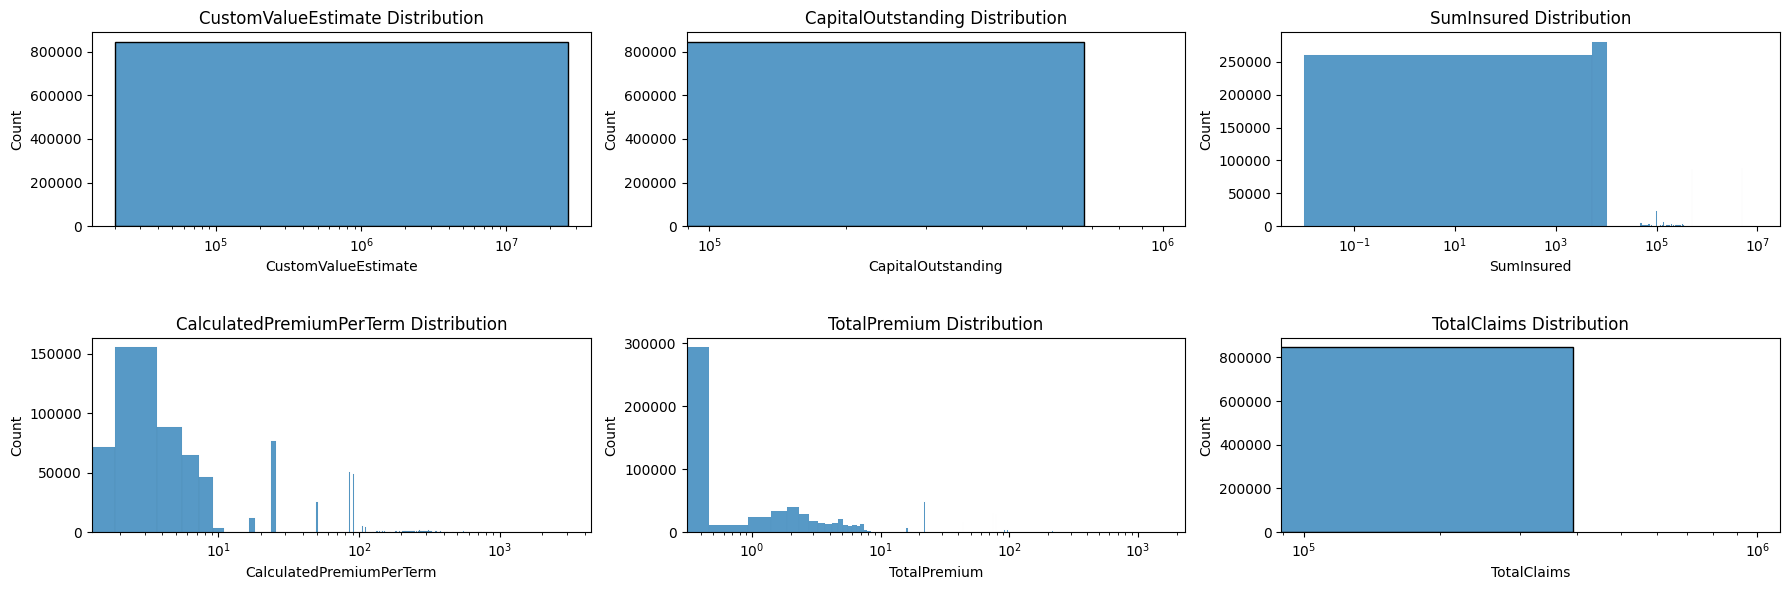

In [26]:
print("Histogram of Numeric Columns Distribution:")

cols = 3
rows = math.ceil(len(main_numeric_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows*3))

for i, col in enumerate(main_numeric_cols):
    r = i // cols
    c = i % cols
    ax = axes[r, c]

    sns.histplot(clean_insurance_df[col], bins="fd", kde=False, ax=ax)
    ax.set_title(f"{col} Distribution")
    ax.set_xscale("log")

# Remove empty plots
for j in range(i + 1, rows * cols):
    r = j // cols
    c = j % cols
    fig.delaxes(axes[r, c])


plt.tight_layout(h_pad=3, w_pad=1)
plt.show()

Bar Charts for Categorical Columns Distribution:


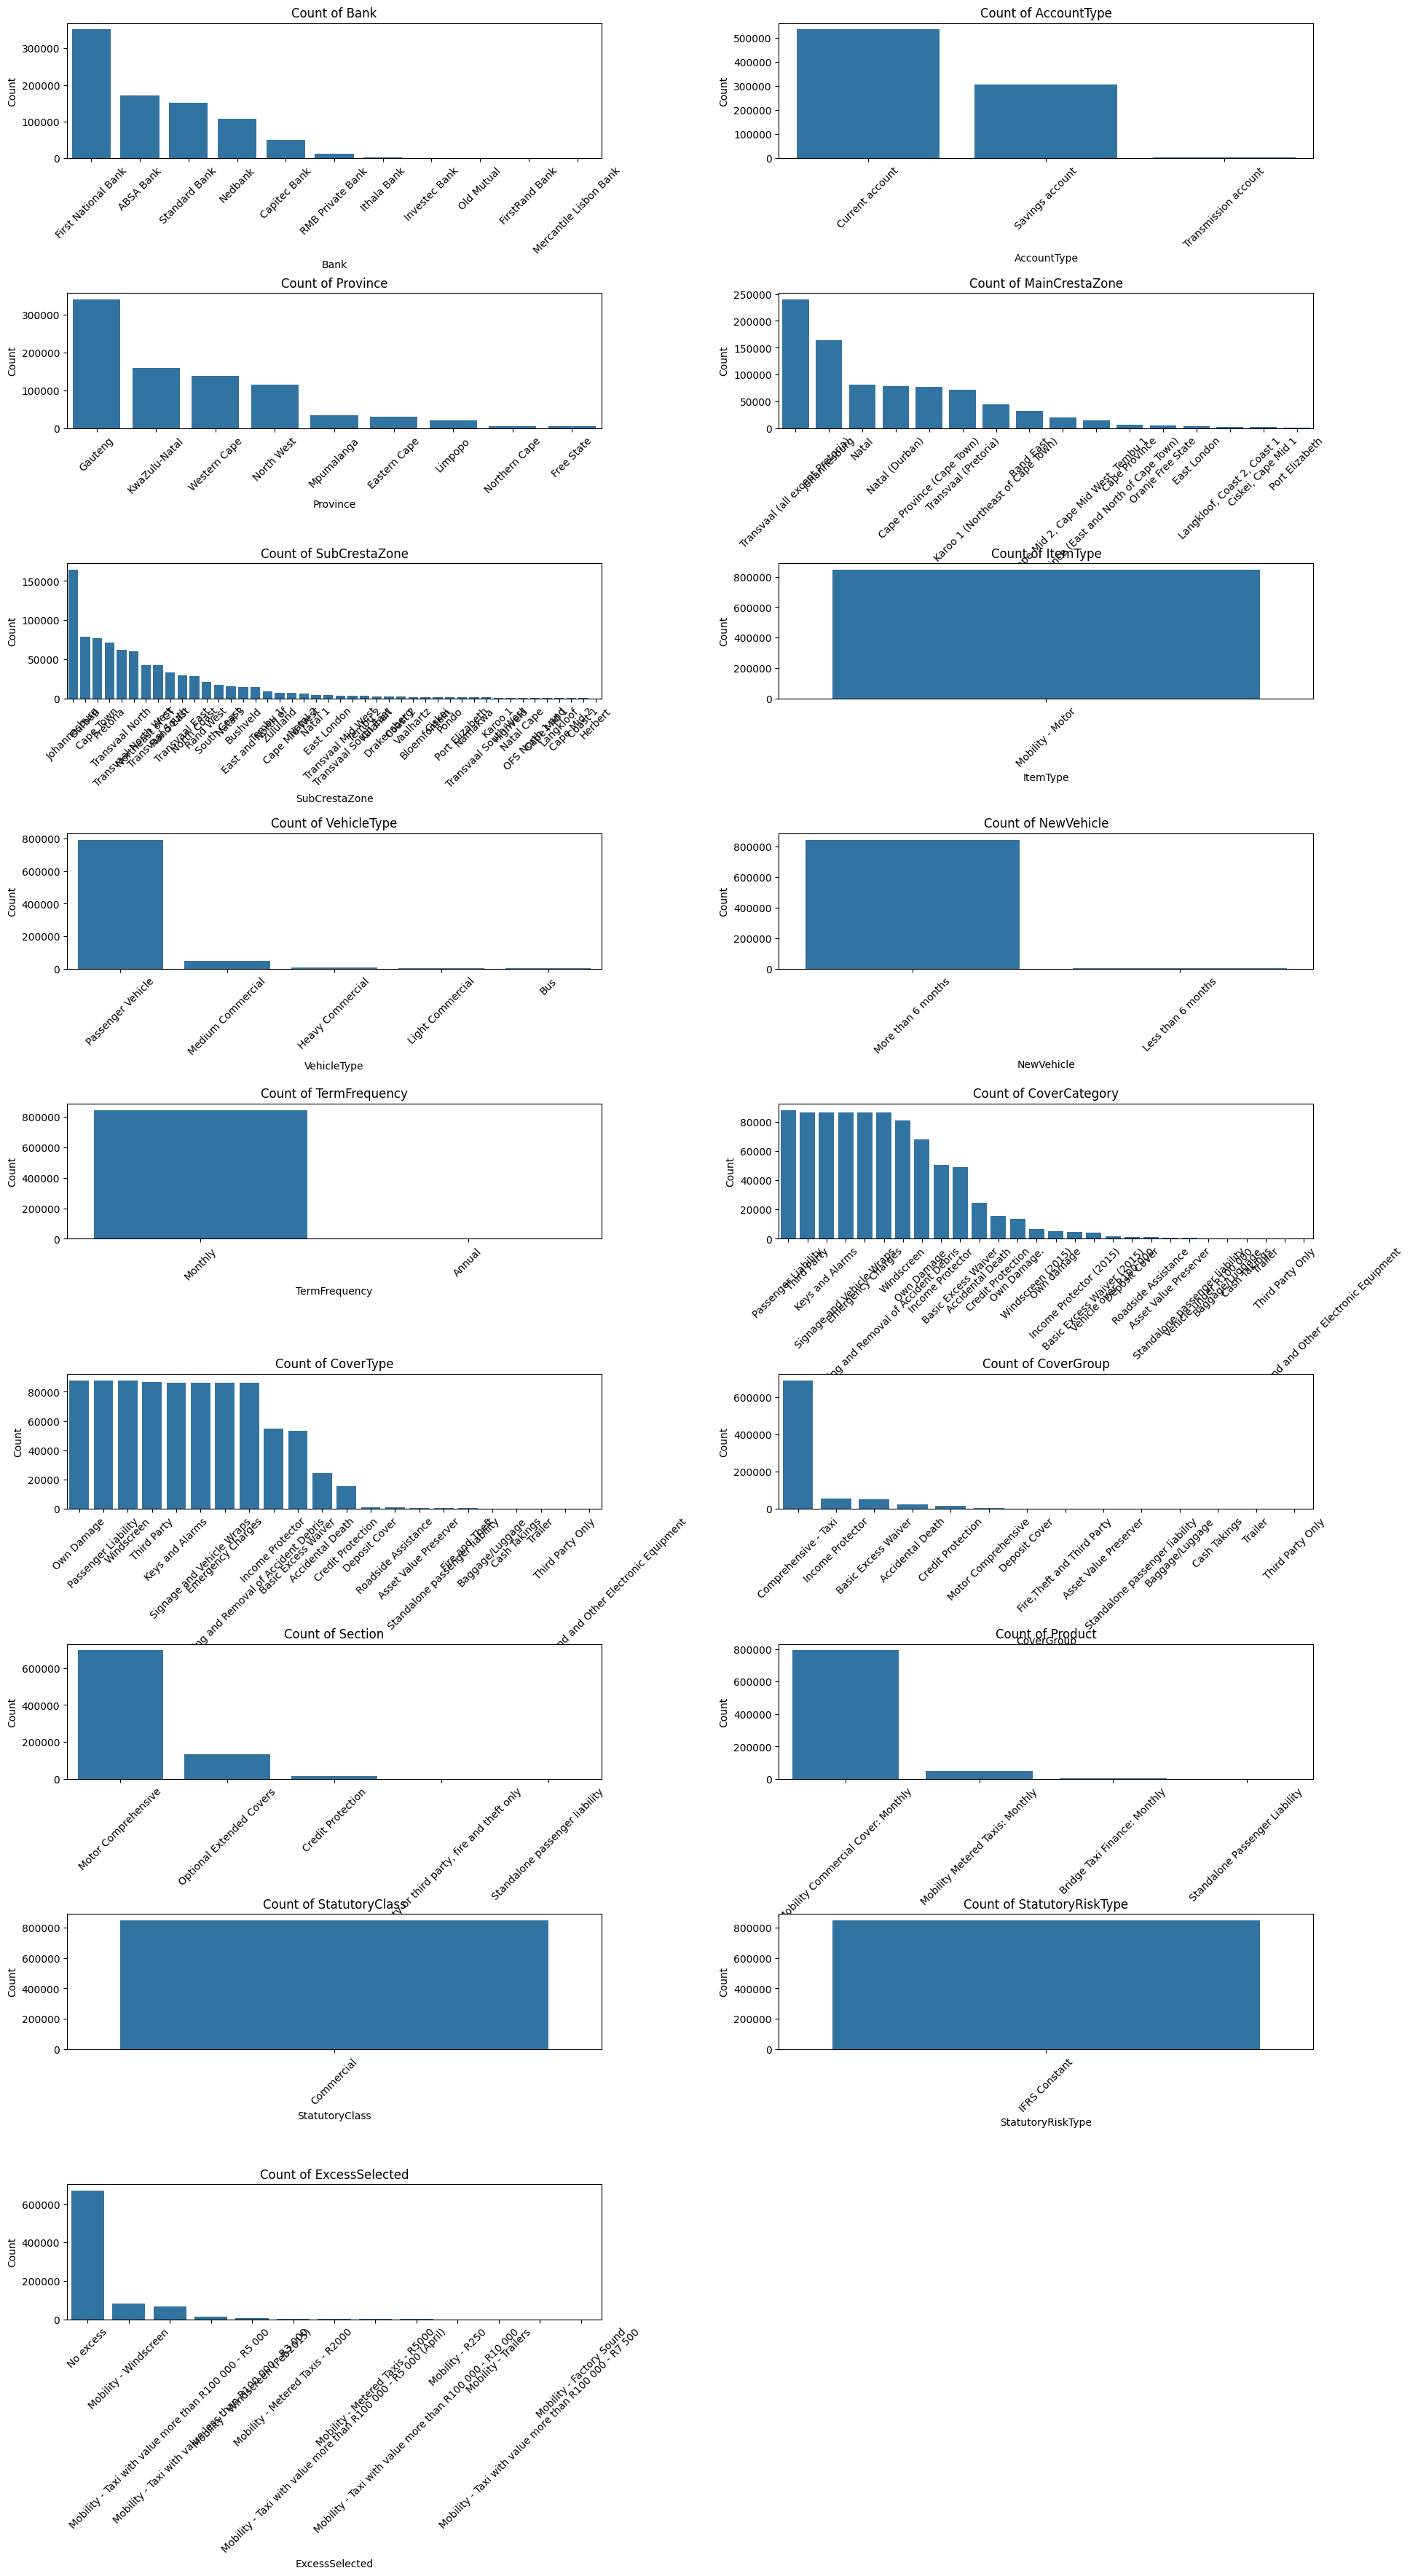

In [45]:
print("Bar Charts for Categorical Columns Distribution:")

cols = 2
rows = math.ceil(len(CATEGORY_COLS) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))

for i, col in enumerate(CATEGORY_COLS):
    category_counts = clean_insurance_df[col].value_counts().reset_index()
    category_counts.columns = [col, "Count"]

    r = i // cols
    c = i % cols
    ax = axes[r, c] if rows > 1 else axes[c]  

    sns.barplot(x=col, y="Count", data=category_counts, ax=ax)

    ax.set_title(f"Count of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)

# Remove empty subplots
for j in range(i + 1, rows * cols):
    r = j // cols
    c = j % cols
    fig.delaxes(axes[r, c])

plt.tight_layout(pad=3.0)
plt.subplots_adjust(hspace=1) 
plt.show()

Correlation between monthly changes between Total Claimed and Total Premium as a function on Postal Code


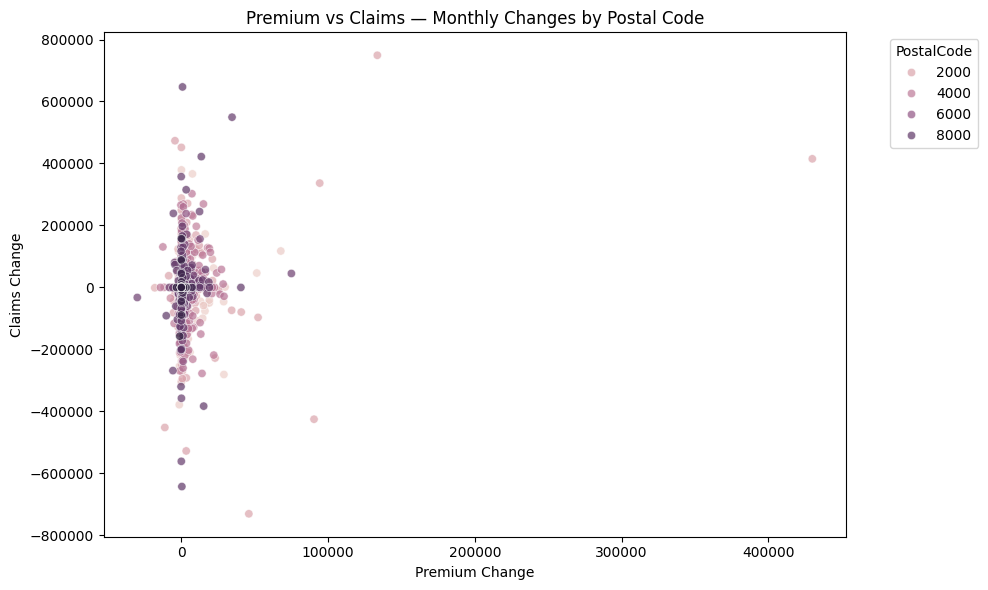

In [55]:
print("Correlation between monthly changes between Total Claimed and Total Premium as a function on Postal Code")


def compute_monthly_changes_by_postal(df: pd.DataFrame) -> pd.DataFrame:
    """
    Computes monthly changes in TotalPremium and TotalClaims for each PostalCode.
    """

    df = df.copy()
    df[Columns.TransactionMonth.value] = pd.to_datetime(
        df[Columns.TransactionMonth.value], errors="coerce"
    )

    # ---- STEP 1: Group by postal code + month ----
    grouped = (
        df.groupby(
            [
                Columns.PostalCode.value,
                df[Columns.TransactionMonth.value].dt.to_period("M"),
            ]
        )
        .agg(
            {
                Columns.TotalPremium.value: "sum",
                Columns.TotalClaims.value: "sum",
            }
        )
        .sort_index()
    )

    # ---- STEP 2: Compute diffs inside each postal code ----
    grouped["premium_change"] = grouped.groupby(level=0)[
        Columns.TotalPremium.value
    ].diff()

    grouped["claims_change"] = grouped.groupby(level=0)[
        Columns.TotalClaims.value
    ].diff()

    # Convert PeriodIndex → Timestamp
    grouped.index = grouped.index.set_levels(
        grouped.index.levels[1].to_timestamp(), level=1
    )

    return grouped


postal_monthly = compute_monthly_changes_by_postal(clean_insurance_df)

"""
Scatter plot of premium_change vs claims_change, 
colored by postal code.
"""
df = postal_monthly.reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="premium_change",
    y="claims_change",
    hue=Columns.PostalCode.value,
    alpha=0.7
)
plt.title("Premium vs Claims — Monthly Changes by Postal Code")
plt.xlabel("Premium Change")
plt.ylabel("Claims Change")
plt.legend(title="PostalCode", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [62]:
def compute_clean_correlation_by_postal(postal_monthly: pd.DataFrame) -> pd.DataFrame:
    df = postal_monthly.reset_index()

    # Remove rows where changes are NaN
    df = df.dropna(subset=["premium_change", "claims_change"])

    results = []

    for pc, group in df.groupby(Columns.PostalCode.value):
        # skip postal codes with zero variance
        if group["premium_change"].std() == 0 or group["claims_change"].std() == 0:
            continue

        corr = group["premium_change"].corr(group["claims_change"])
        results.append({Columns.PostalCode.value: pc, "correlation": corr})

    return pd.DataFrame(results)

compute_clean_correlation_by_postal(postal_monthly)

/Users/elshaday/DEV/10Academy/insurance-risk-analysis-week3/venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/elshaday/DEV/10Academy/insurance-risk-analysis-week3/venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/elshaday/DEV/10Academy/insurance-risk-analysis-week3/venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,PostalCode,correlation
0,1,-0.022557
1,2,-0.037153
2,5,0.000000
3,8,0.103012
4,21,0.718255
...,...,...
382,9301,-0.085014
383,9306,0.000000
384,9756,0.524869
385,9781,0.000000


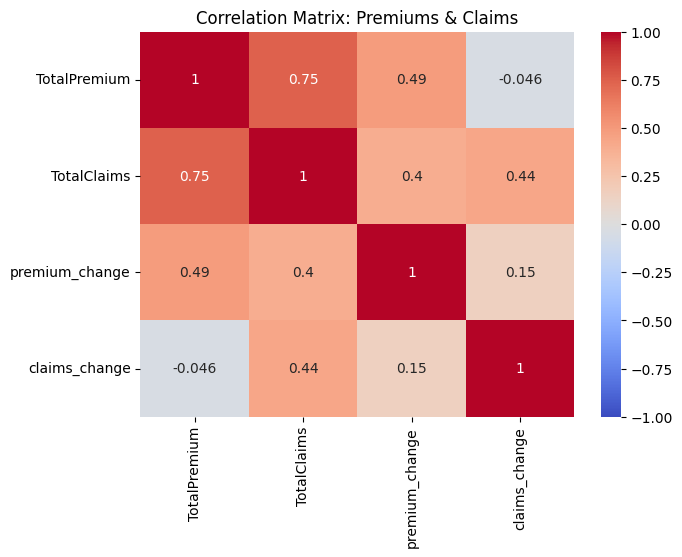

In [64]:
corr_matrix = postal_monthly[
    [Columns.TotalPremium.value, 
     Columns.TotalClaims.value, 
     "premium_change", 
     "claims_change"]
].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix: Premiums & Claims")
plt.show()

Trends in Premium by PostalCode:


/var/folders/z4/j71xz2fs1270kjsdtgg3ckzh0000gn/T/ipykernel_62185/1786201367.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key=Columns.TransactionMonth.value, freq="M"),


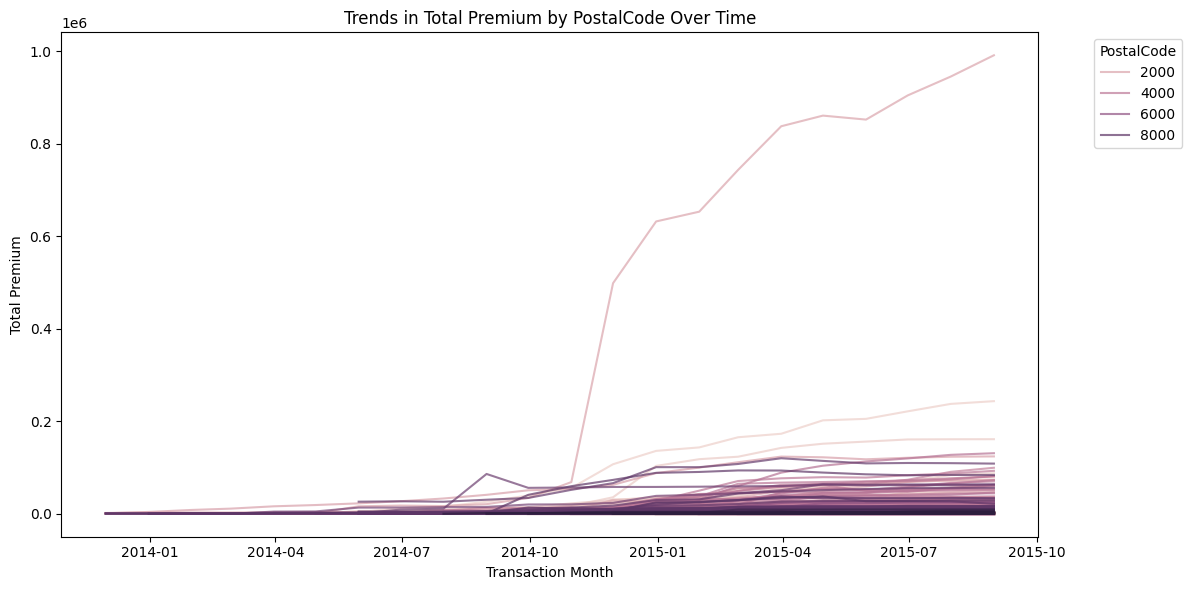

In [65]:
print("Trends in Premium by PostalCode:")
premium_trends = (
    df.groupby(
        [
            Columns.PostalCode.value,
            pd.Grouper(key=Columns.TransactionMonth.value, freq="M"),
        ]
    )
    .agg(TotalPremium=(Columns.TotalPremium.value, "sum"))
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=premium_trends,
    x=Columns.TransactionMonth.value,
    y="TotalPremium",
    hue=Columns.PostalCode.value,
    alpha=0.7,
)
plt.title("Trends in Total Premium by PostalCode Over Time")
plt.xlabel("Transaction Month")
plt.ylabel("Total Premium")
plt.legend(title="PostalCode", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

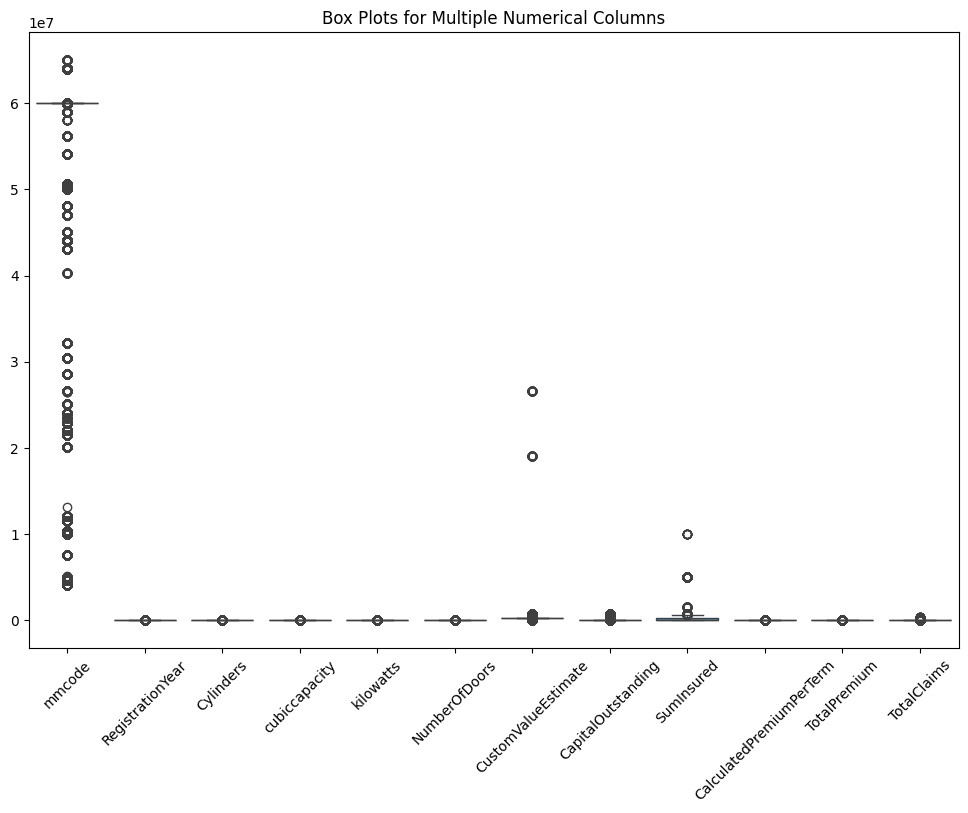

In [72]:
# Plotting multiple numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=clean_insurance_df[NUMERIC_COLS]
)  # List the numerical columns
plt.title("Box Plots for Multiple Numerical Columns")
plt.xticks(rotation=45)  # Rotate the labels if necessary
plt.show()

Scatter plot showing the relationship between Premium and Claims


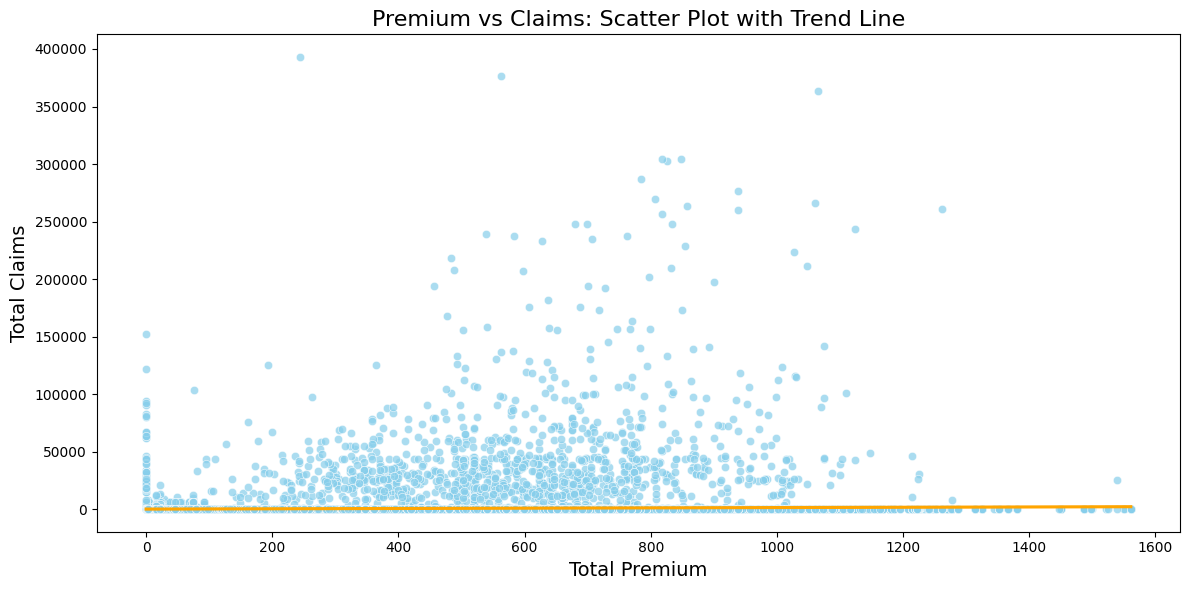

In [73]:
print("Scatter plot showing the relationship between Premium and Claims")

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="TotalPremium",
    y="TotalClaims",
    data=clean_insurance_df,
    alpha=0.7,
    color="skyblue",
)

# Add a linear regression line
sns.regplot(
    x="TotalPremium",
    y="TotalClaims",
    data=clean_insurance_df,
    scatter=False,
    color="orange",
)

plt.title("Premium vs Claims: Scatter Plot with Trend Line", fontsize=16)
plt.xlabel("Total Premium", fontsize=14)
plt.ylabel("Total Claims", fontsize=14)
plt.tight_layout()
plt.show()

Cover Type Distribution Over Time


<Figure size 1400x800 with 0 Axes>

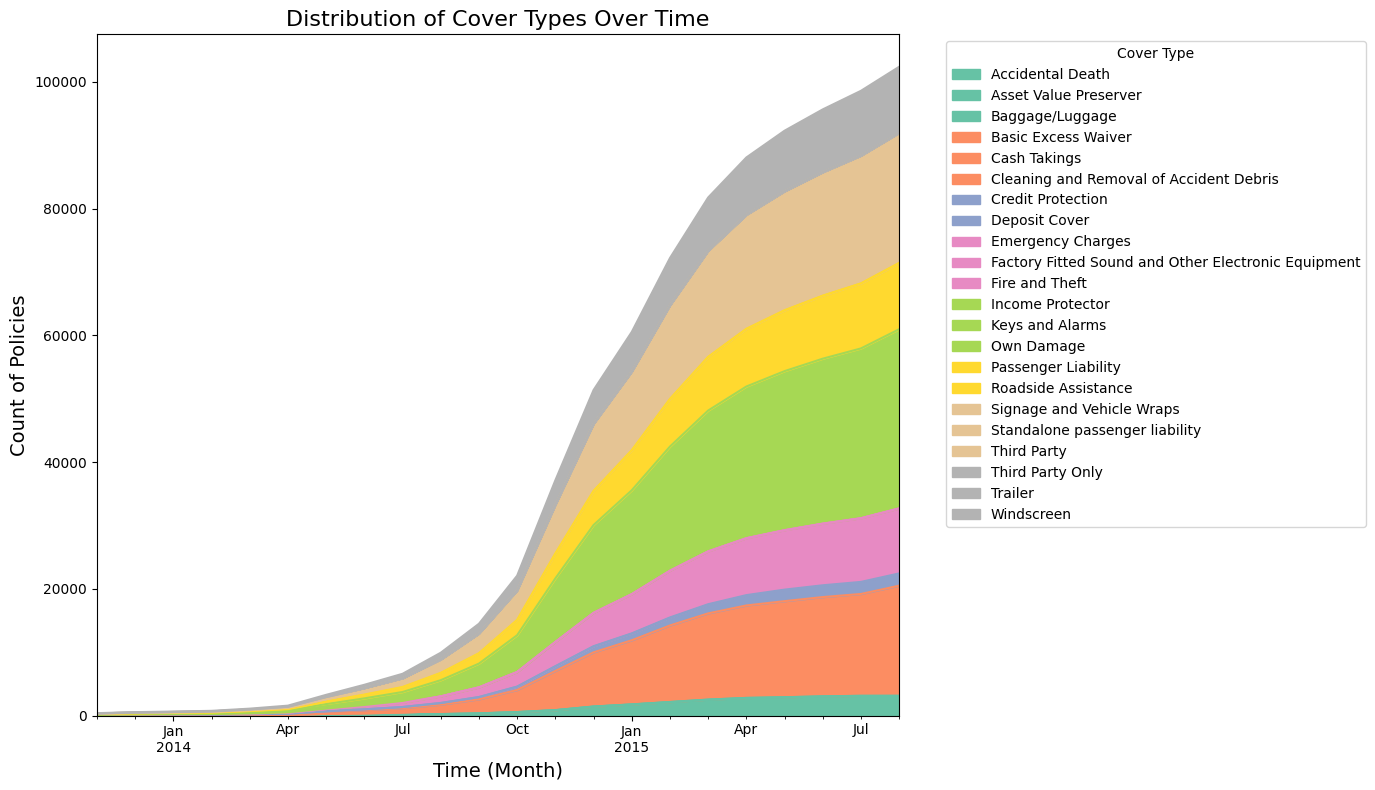

In [74]:
print("Cover Type Distribution Over Time"
)
# Grouping by TransactionMonth and CoverType, and then counting the occurrences
cover_type_time = (
    clean_insurance_df.groupby(
        [
            pd.to_datetime(
                clean_insurance_df[Columns.TransactionMonth.value]
            ).dt.to_period("M"),
            Columns.CoverType.value,
        ]
    )[
        Columns.PolicyID.value
    ]
    .count()
    .unstack()
    .fillna(0)
)

# Stacked area plot
plt.figure(figsize=(14, 8))
cover_type_time.plot.area(stacked=True, colormap="Set2", figsize=(14, 8))

plt.title("Distribution of Cover Types Over Time", fontsize=16)
plt.xlabel("Time (Month)", fontsize=14)
plt.ylabel("Count of Policies", fontsize=14)
plt.legend(title="Cover Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Regional Premium Heatmap by Postal Code and Month


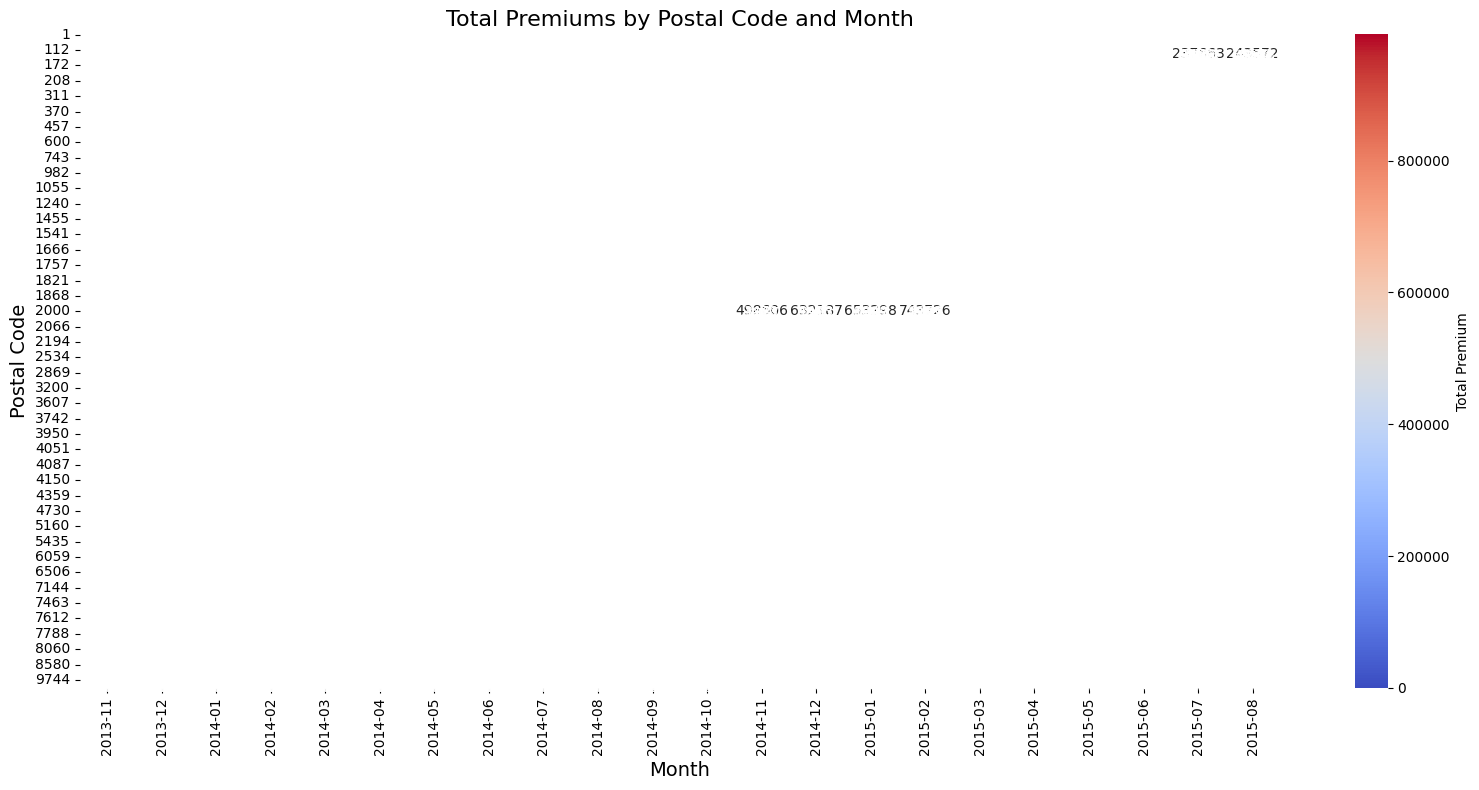

In [ ]:
print("Regional Premium Heatmap by Postal Code and Month")
# Grouping by PostalCode and TransactionMonth to calculate total premium sums
clean_insurance_df[Columns.TransactionMonth.value] = pd.to_datetime(
    clean_insurance_df[Columns.TransactionMonth.value]
)

premium_by_postal_month = (
    clean_insurance_df.groupby(
        [
            Columns.PostalCode.value,
            clean_insurance_df[Columns.TransactionMonth.value].dt.to_period("M"),
        ]
    )["TotalPremium"]
    .sum()
    .unstack(fill_value=0)
)


# Plotting the heatmap
plt.figure(figsize=(16, 8))

sns.heatmap(
    premium_by_postal_month,
    annot=True,
    fmt=".0f",
    cmap="coolwarm",
    cbar_kws={"label": "Total Premium"},
    linewidths=0.5,
)

# Adding labels and title
plt.title("Total Premiums by Postal Code and Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Postal Code", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()